<h1 style="text-align:center;"> The World Happiness Report </h1>

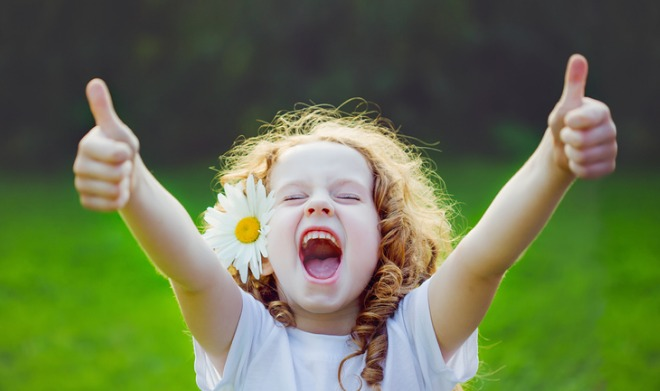

The report primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website. (Wikipedia)
 

The World Happiness Report uses markers to indicate the happiness of each country. It is collected to create a "Ladder Score" and then it is eventually changed to include a "Dystopia + residual" score. The main indicators include...

- GDP per capita
- Social Support
- Life Expectancy
- Freedom of Life Choices
- Generosity
- Perception of Corruption


The 2020 World Happiness Report, released on March 20, 2020, ranks 156 countries based on an average of three years of surveys between 2017 and 2019. The 2020 report especially focuses on the environment – social, urban, and natural, and includes links between happiness and sustainable development. (Wikipedia)

***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
happy = pd.read_csv("world-happiness-report-2021.csv")

In [4]:
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


<h1>Any missing values?</h1>

In [5]:
happy.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [6]:
# how many countries? 
happy['Country name'].value_counts()

Finland         1
Ghana           1
Turkmenistan    1
Gambia          1
Benin           1
               ..
Latvia          1
Colombia        1
Hungary         1
Thailand        1
Afghanistan     1
Name: Country name, Length: 149, dtype: int64

# Some *GRAPHS* to get us started

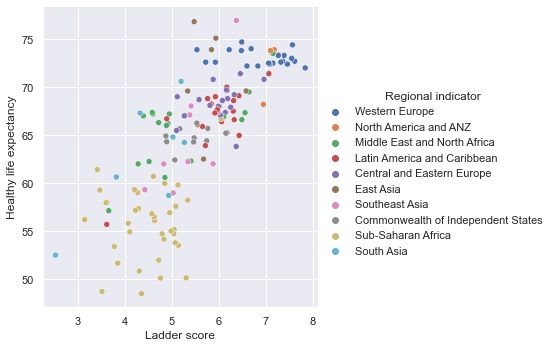

In [7]:
sns.set_theme()

sns.relplot(
    data=happy,
    x='Ladder score', 
    y='Healthy life expectancy', 
    hue='Regional indicator')

Well, this is clear. Western Europe does a great job as a happiness indicator. However, i fyou look closely you can see that North America and ANZ probably have a better overall happiness score. 

I wanna take a closer look at who the top 25 countries are in terms of <code> Healthy life expectancy </code> and the <code> Ladder score </code>

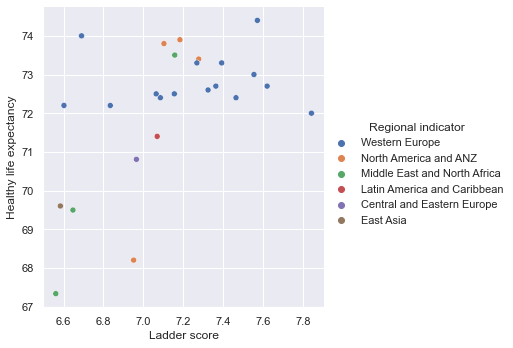

In [8]:
# seperate out the top 25
top_25 = happy[:25]

g = sns.relplot(
    data=top_25,
    x='Ladder score', 
    y='Healthy life expectancy',
    hue='Regional indicator')

In [9]:
print(top_25['Regional indicator'].value_counts())
print(happy['Regional indicator'].value_counts())

Western Europe                  15
North America and ANZ            4
Middle East and North Africa     3
Latin America and Caribbean      1
Central and Eastern Europe       1
East Asia                        1
Name: Regional indicator, dtype: int64
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64


Western Europe looks like quite a nice place to be, but we'll have to compare the total countries versus the top_25 countries. 4 out of 4 is just as good as 15 out of 15. 

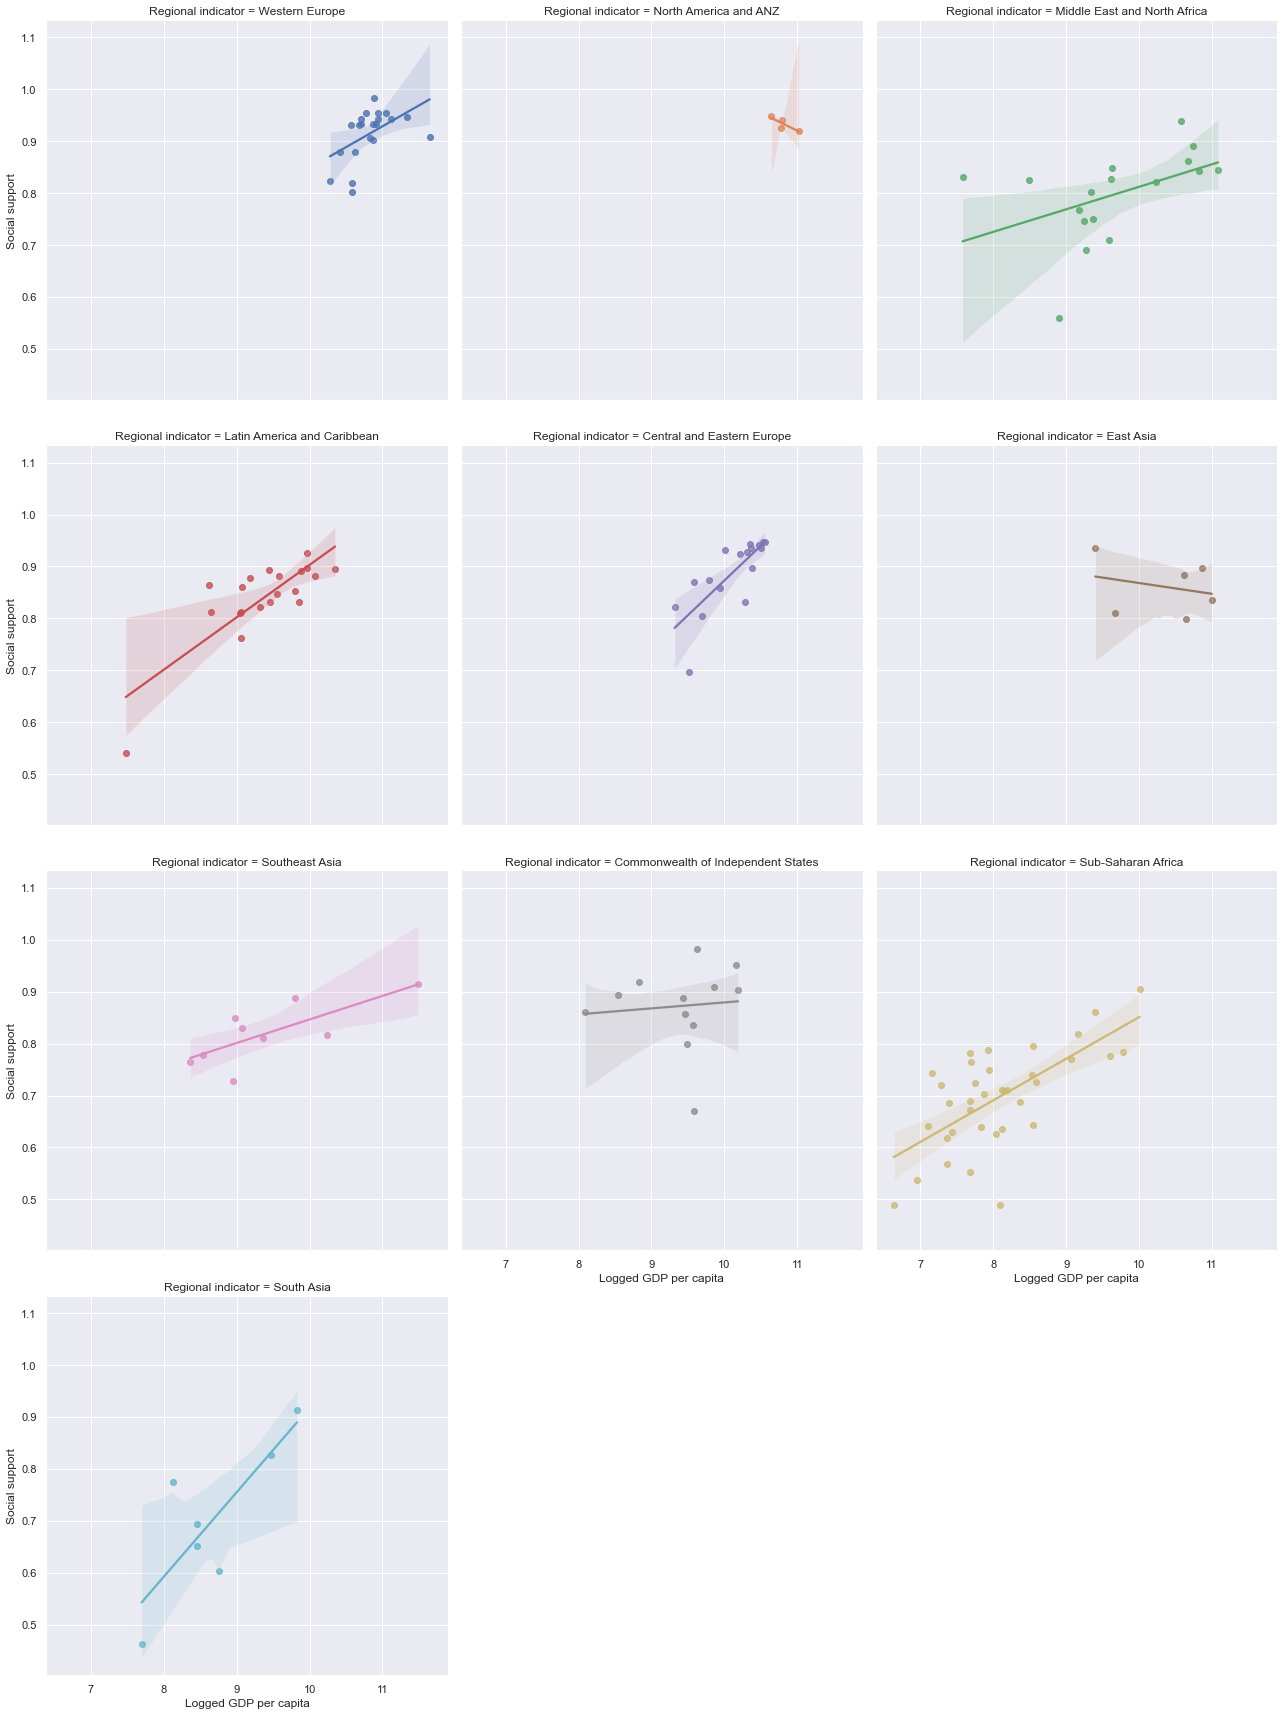

In [10]:
g = sns.lmplot(x='Logged GDP per capita',
              y='Social support',
              hue='Regional indicator', 
              col='Regional indicator',
              col_wrap=3,
              data=happy, 
              height=6)

The scores in both East Asia and North America and ANZ of **Social Support actually goes down when the GDP per capita increases.** That's a bit strange. I guess it's shows us that money will "buy happiness" up to a certain amount. But that also doesn't help us identify why Western Europe is doing so well. 

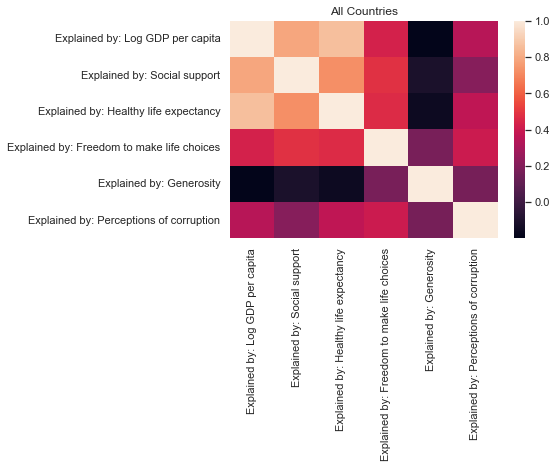

In [11]:
sns.set_theme(style="white")
ax = sns.heatmap(happy[happy.columns[13:19]].corr()).set_title("All Countries")

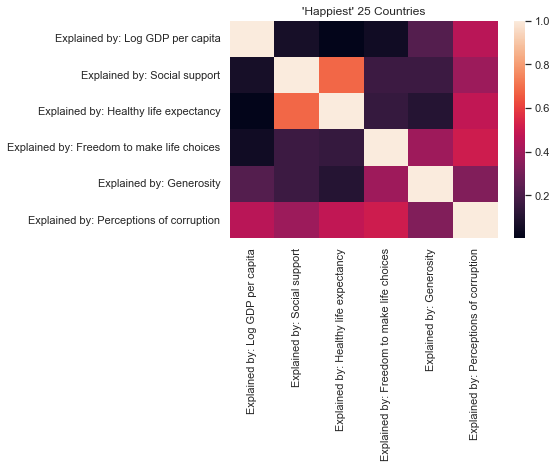

In [12]:
sns.set_theme(style="white")
ax = sns.heatmap(top_25[top_25.columns[13:19]].corr()).set_title("'Happiest' 25 Countries")

A quick look at these graphs shows us that once the GDP, Healthy Life Style, and Social Interactions are met, then people tend to focus more on extrernal things like **Perceptions of corruption**. That fits nicely into...
- Maslow's Hierarchy of Needs

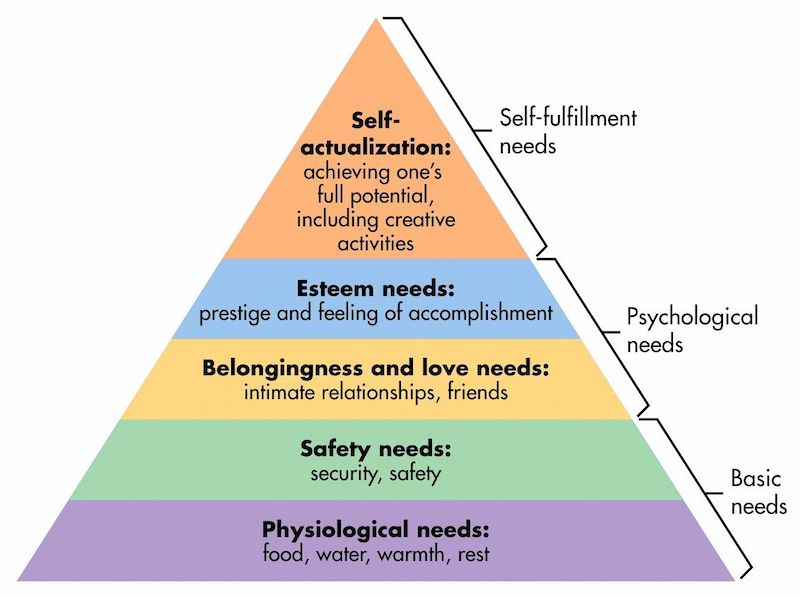

<h1> TensorFlow: Basic Regression </h1>

We'll test a few models to see which one does the best in this situation. We'll take the attributes and use a regression to predict the output of the "happiness" scale. I chose the "Ladder score" as the output variable. 
- single input
- linear model
- dnn model (single input)
- dnn model (multiple input)

In [13]:
train_dataset = happy.sample(frac=0.8, random_state=0)
test_dataset = happy.drop(train_dataset.index)

<h3> Let's take a look at the data </h3>

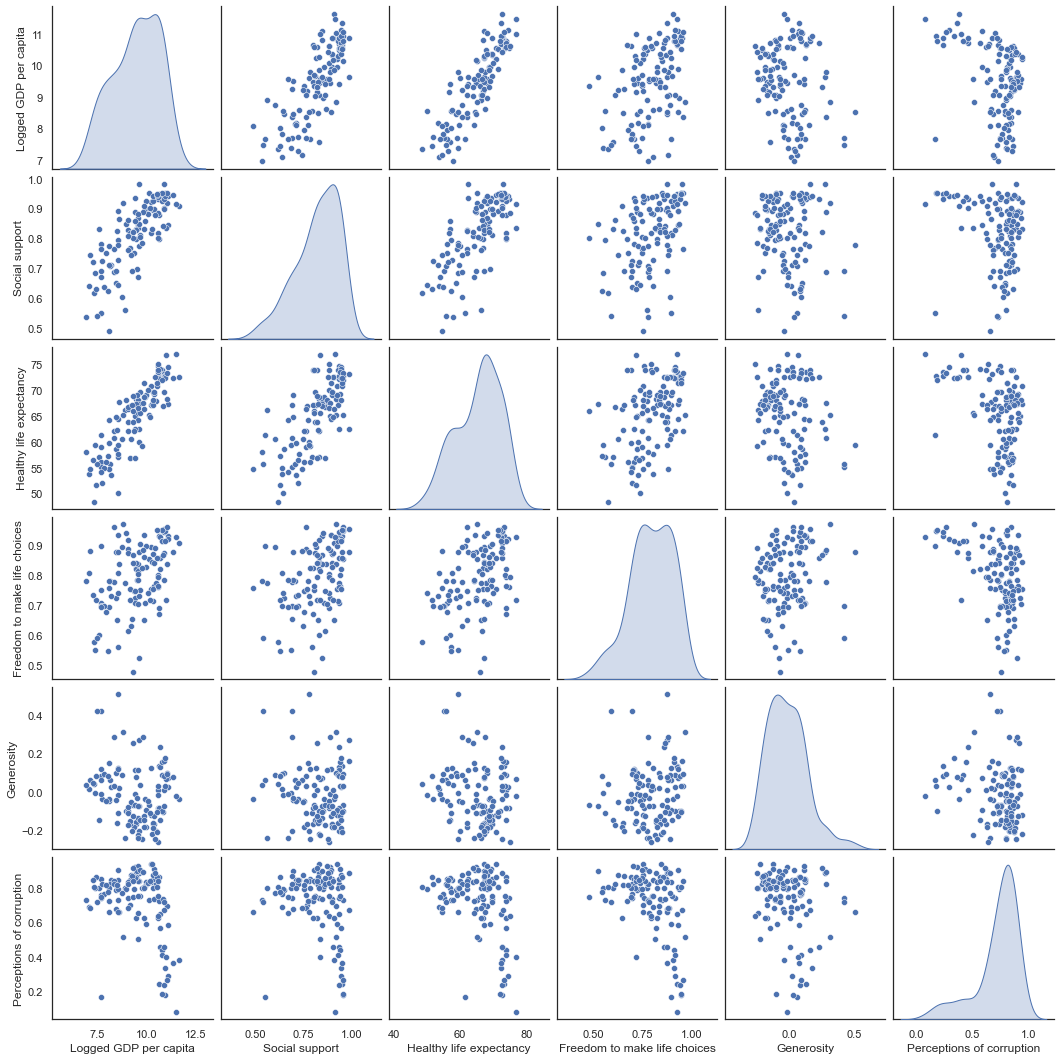

In [14]:
sns.pairplot(train_dataset[['Logged GDP per capita', 'Social support', 
                            'Healthy life expectancy', 'Freedom to make life choices', 
                           'Generosity', 'Perceptions of corruption']], diag_kind='kde')

In [15]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ladder score,119.0,5.581101,1.070950e+00,3.145,4.8530,5.536,6.3235,7.842
Standard error of ladder score,119.0,0.056916,2.009241e-02,0.026,0.0425,0.053,0.0680,0.173
upperwhisker,119.0,5.692723,1.048954e+00,3.259,4.9920,5.636,6.4130,7.904
lowerwhisker,119.0,5.469471,1.093950e+00,3.030,4.7220,5.442,6.2290,7.780
Logged GDP per capita,119.0,9.472370,1.172255e+00,6.958,8.5415,9.577,10.5425,11.647
Social support,119.0,0.818471,1.125191e-01,0.489,0.7500,0.832,0.9125,0.983
Healthy life expectancy,119.0,65.400202,6.659351e+00,48.478,60.2725,67.000,70.3995,76.953
Freedom to make life choices,119.0,0.795311,1.083242e-01,0.480,0.7215,0.800,0.8805,0.970
Generosity,119.0,-0.013706,1.503669e-01,-0.258,-0.1250,-0.034,0.0820,0.509
Perceptions of corruption,119.0,0.720866,1.902851e-01,0.082,0.6685,0.794,0.8445,0.939


<h2> Separate the Target Value <code>'Ladder score'</code> from the labels

In [16]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# we'll also drop these values that we don't need and will skew the results
train_features.drop(columns=['Country name', 'Regional indicator', 
                             'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                            'Ladder score in Dystopia', 'Dystopia + residual'], inplace=True)
test_features.drop(columns=['Country name', 'Regional indicator', 
                             'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                            'Ladder score in Dystopia', 'Dystopia + residual'], inplace=True)

train_labels = train_features.pop('Ladder score')
test_labels = test_features.pop('Ladder score')

It appears the Columns have already been normalized by using the "Explained by:" characteristic. We'll take that at face value and move onto the next parts. However, we'll run a Normalization through the data as well to make sure we've done our part. It shouldn't affect the predictions. 

In [17]:
# first, let's get a whole dataset normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

2022-05-13 20:22:40.569689: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
print(normalizer.mean.numpy())

[[ 9.4723701e+00  8.1847060e-01  6.5400208e+01  7.9531097e-01
  -1.3705882e-02  7.2086549e-01  9.9118489e-01  8.0173945e-01
   5.3299999e-01  5.0323534e-01  1.7897479e-01  1.3934454e-01]]


In [19]:
first = np.array(train_features[:1])

In [20]:
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 8.54  0.8  57.16  0.56 -0.11  0.73  0.67  0.75  0.27  0.22  0.12  0.13]]

Normalized: [[-0.8  -0.21 -1.24 -2.17 -0.62  0.05 -0.8  -0.21 -1.24 -2.17 -0.61 -0.05]]


<h2> 1. Linear Regression Model </h2>

I'm choosing Life Expectancy as our single-variable linear regression. It seems to be an okay indicator of happiness. 

In [29]:
life_exp = np.array(train_features['Explained by: Healthy life expectancy']).reshape(-1, 1)

life_exp_normalizer = preprocessing.Normalization(input_shape=[1,])
life_exp_normalizer.adapt(life_exp)

In [30]:
#and now the sequential model build

life_exp_model = tf.keras.Sequential([
    life_exp_normalizer, 
    layers.Dense(units=1)
])

life_exp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model predicts the <code> Ladder Score </code> from <code> Life Expectancy </code>

In [31]:
life_exp_model.predict(life_exp[:10])

array([[-0.25283107],
       [-0.01555881],
       [ 0.16531266],
       [ 0.05251109],
       [ 0.22074099],
       [-0.20518216],
       [-0.2538035 ],
       [-0.3559084 ],
       [-0.2849212 ],
       [-0.46773756]], dtype=float32)

In [32]:
life_exp_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [33]:
%%time
history = life_exp_model.fit(
    train_features['Explained by: Healthy life expectancy'], train_labels, 
    epochs=100, 
    verbose=0, 
    validation_split=0.2)

CPU times: user 2.06 s, sys: 139 ms, total: 2.2 s
Wall time: 2.02 s


In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.584280,0.566393,95
96,0.585655,0.563408,96
97,0.584931,0.562287,97
98,0.586495,0.563721,98
99,0.583748,0.566214,99


In [35]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Life Expectancy]')
    plt.legend()
    plt.grid(True)

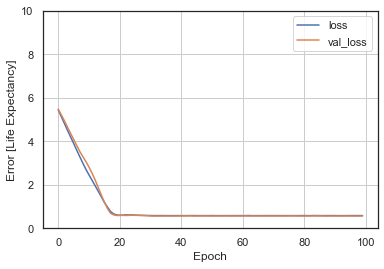

In [36]:
plot_loss(history)

In [37]:
test_results = {}

test_results['life_exp_model'] = life_exp_model.evaluate(
    test_features['Explained by: Healthy life expectancy'], 
    test_labels, verbose=0)

In [38]:
x = tf.linspace(0.0, 1, 150)
y = life_exp_model.predict(x)

In [39]:
def plot_life_exp(x, y):
    plt.scatter(train_features['Explained by: Healthy life expectancy'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Happiness Score')
    plt.legend()


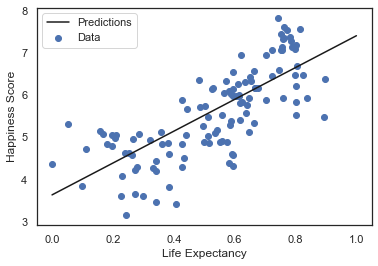

In [40]:
plot_life_exp(x,y)

<h2> Multiple Inputs (Linear Regression) </h2>

In [41]:
linear_model = tf.keras.Sequential([
    normalizer, 
    layers.Dense(units=1)
])

In [42]:
linear_model.predict(train_features[:10])

array([[-1.8686929 ],
       [ 0.6048278 ],
       [ 1.7094857 ],
       [ 0.597552  ],
       [ 0.96222055],
       [-2.41975   ],
       [-0.8541525 ],
       [-1.9661331 ],
       [-1.2993505 ],
       [-2.2291863 ]], dtype=float32)

In [43]:
linear_model.layers[1].kernel

<tf.Variable 'dense_2/kernel:0' shape=(12, 1) dtype=float32, numpy=
array([[ 0.49218976],
       [ 0.44993603],
       [ 0.30342746],
       [ 0.66143036],
       [-0.05874616],
       [ 0.30420798],
       [-0.5494398 ],
       [ 0.5719211 ],
       [-0.09632516],
       [ 0.15826303],
       [-0.44653916],
       [-0.19767267]], dtype=float32)>

In [44]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history = linear_model.fit(
    train_features, 
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2)

CPU times: user 2.09 s, sys: 146 ms, total: 2.23 s
Wall time: 2.02 s


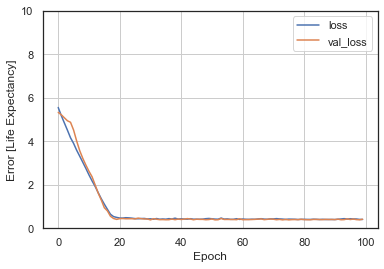

In [46]:
plot_loss(history)

In [47]:
test_results['linear_model'] = linear_model.evaluate(
test_features, test_labels, verbose=0)

<h2> DNN Regression Model </h2>

In [48]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [49]:
dnn_life_exp_model = build_and_compile_model(life_exp_normalizer)

In [50]:
dnn_life_exp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [51]:
%%time
history = dnn_life_exp_model.fit(
    train_features['Explained by: Healthy life expectancy'], train_labels, 
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 2.25 s, sys: 190 ms, total: 2.44 s
Wall time: 2.15 s


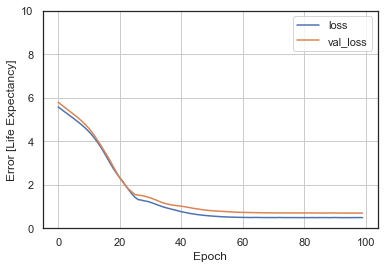

In [52]:
plot_loss(history)

In [53]:
x = tf.linspace(0.0, 1, 150)
y = dnn_life_exp_model.predict(x)

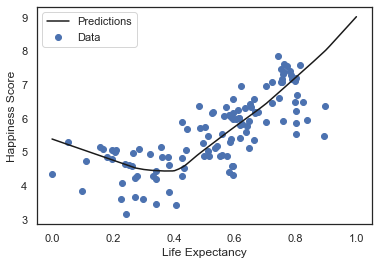

In [54]:
plot_life_exp(x,y)

In [55]:
test_results['dnn_life_exp_model'] = dnn_life_exp_model.evaluate(
    test_features['Explained by: Healthy life expectancy'], 
    test_labels, 
    verbose=0)

<h3> Full Model - using all the inputs </h3> 
Hopefully this will improve the performance. 

In [56]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [57]:
%%time
history = dnn_model.fit(
    train_features, 
    train_labels, 
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 2.32 s, sys: 195 ms, total: 2.51 s
Wall time: 2.24 s


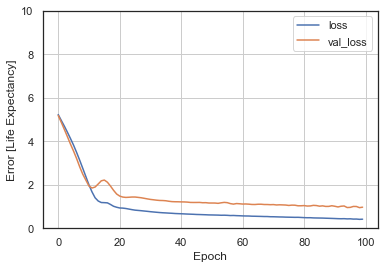

In [58]:
plot_loss(history)

In [59]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [60]:
pd.DataFrame(test_results, index=['Mean Absolute Error [Ladder score]']).T

,Mean Absolute Error [Ladder score]
life_exp_model,0.486428
linear_model,0.460526
dnn_life_exp_model,0.706074
dnn_model,1.130930


In [61]:
group = ['yes', 'no', 'see']

for x in group: 
    print(x)

yes
no
see


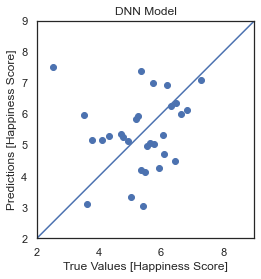

In [62]:
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
plt.title('DNN Model')
lims = [2, 9]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

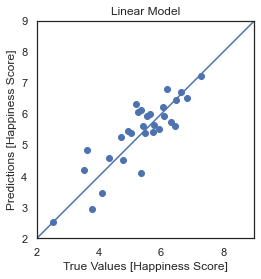

In [63]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
plt.title('Linear Model')
lims = [2, 9]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

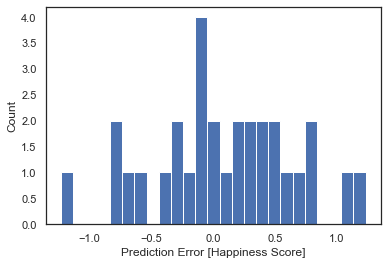

In [64]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Happiness Score]')
_ = plt.ylabel('Count')

It sure appears that the linear model has the best mean absolute error score here. Sometimes a DNN model can overfit, and I think that's what has happened here. The data only include 119 countries, so it's not a lot of data for a machine learning algorithm. 

Sources: 

https://en.wikipedia.org/wiki/World_Happiness_Report